In [2]:
%config IPCompleter.use_jedi = False
from wholeslidedata.iterators import create_batch_iterator
import numpy as np
from matplotlib import pyplot as plt
from plot_utils import init_plot, plot_batch, show_plot
from shapely.prepared import prep
import time

# BatchIterator 

In [3]:
# basic user config 
user_config = './user_config.yml'

# mode of batch iterator
mode = 'training'

# number of cpus used to extract patches on multiple cores
cpus = 1

In [4]:
# Loading the full dataset

# t1 = time.time()
# with create_batch_iterator(user_config=user_config, 
#                            number_of_batches=number_of_batches,
#                             mode=mode, 
#                             cpus=cpus) as training_batch_generator:
#     pass
# print(time.time() - t1)

### Finite (with reset)

When adding 'number_of_batches' as argument to the create_batch_iterator, the iterator will reset itelf after the specified number of batches.
As can be seen, the patches/masks under "Batches (repeat=0)" and "Batches (repeat=1)" are identical at every location in the batches.

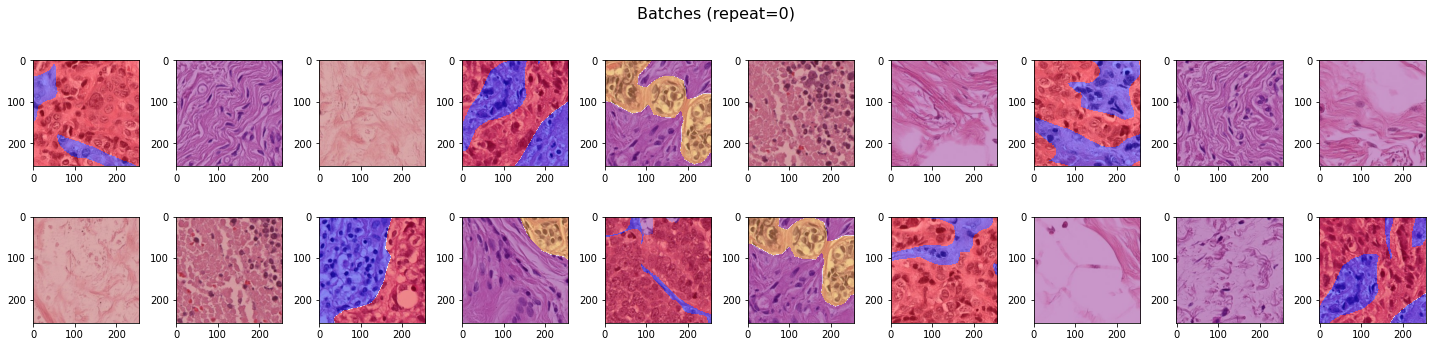

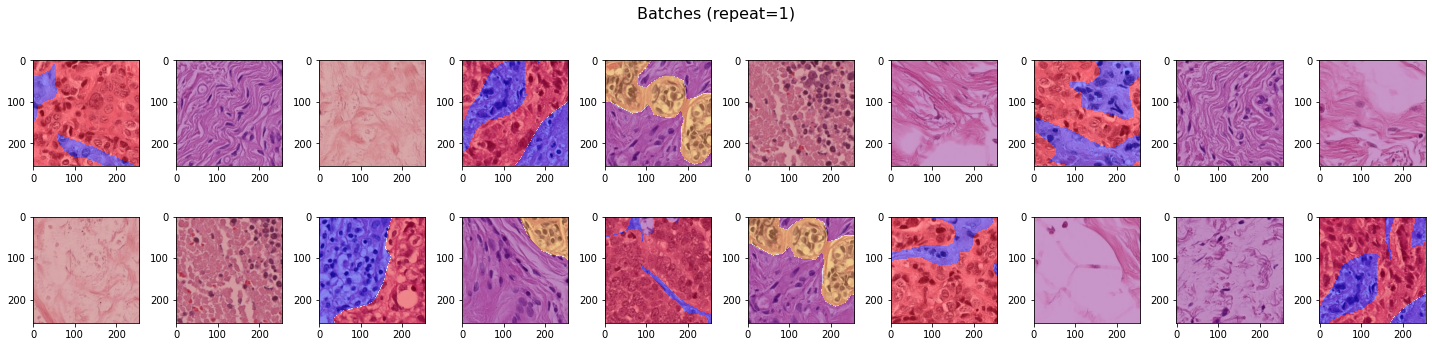

In [7]:
# create batch iterator via context manager
number_of_batches = 2
repeats=2
with create_batch_iterator(user_config=user_config, 
                           number_of_batches=number_of_batches,
                            mode=mode, 
                            cpus=cpus) as training_batch_generator:
    
    for r in range(repeats):
        fig, axes = init_plot(number_of_batches, training_batch_generator.batch_size, size=(20,5))
        for idx, (x_batch, y_batch, info) in enumerate(training_batch_generator):
            plot_batch(axes, idx, x_batch, y_batch)
        show_plot(fig, r)

### Infinite (no reset)

When 'number_of_batches' is not give as an argument to create_batch_iterator, or takes on a value of None, the iterator will not reset and an infinite stream of random patches will be generated.
As can be seen, the patches/masks under "Batches (repeat=0)" and "Batches (repeat=1)" are NOT identical at every location in the batches.

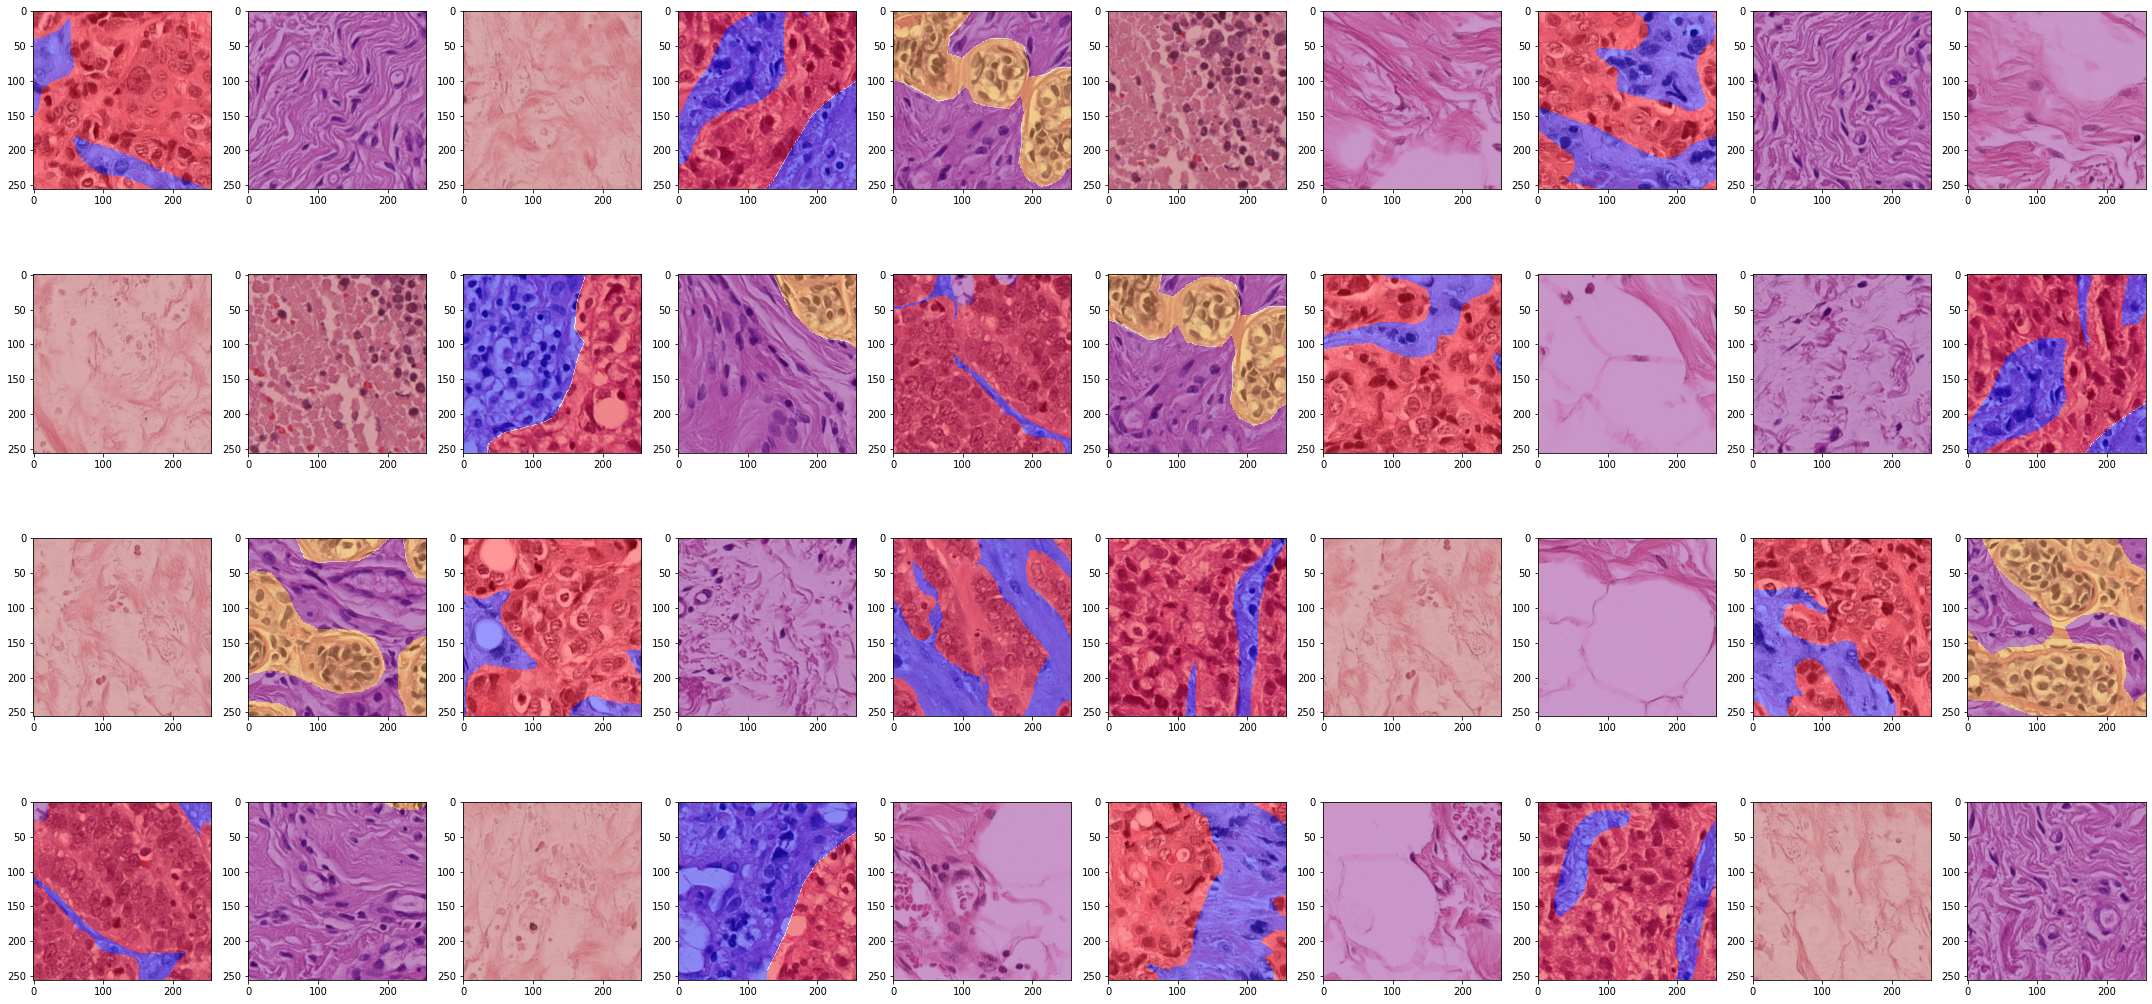

In [8]:
with create_batch_iterator(user_config=user_config, 
                            mode=mode, 
                            cpus=cpus) as training_batch_generator:
    number_of_batches = 4
    fig, axes = init_plot(number_of_batches, training_batch_generator.batch_size, size=(30,15))
    for idx in range(number_of_batches):
        x_batch, y_batch, info = next(training_batch_generator)
        plot_batch(axes, idx, x_batch, y_batch)
    plt.tight_layout()
    plt.show()


# One Hot Encoding

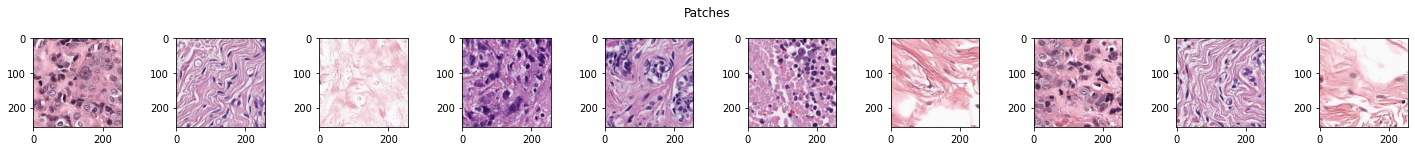

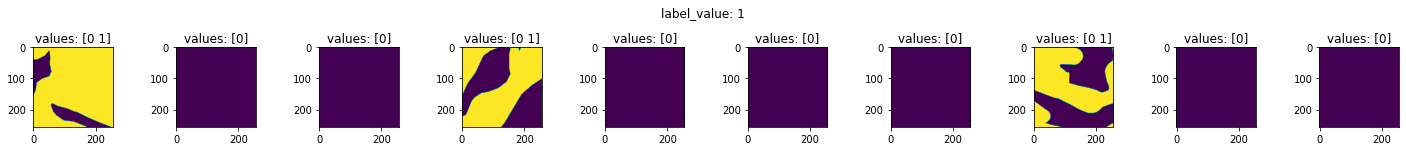

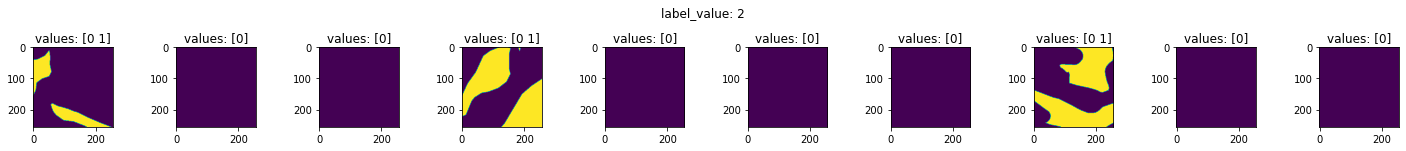

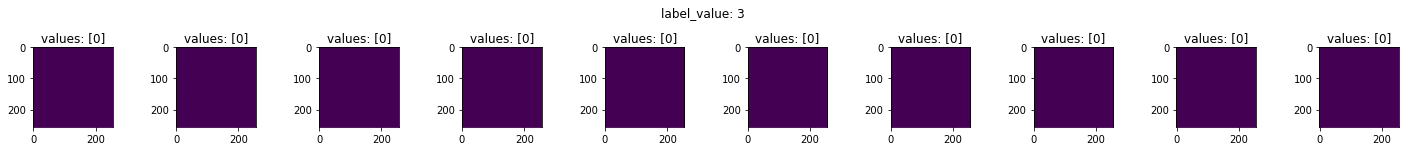

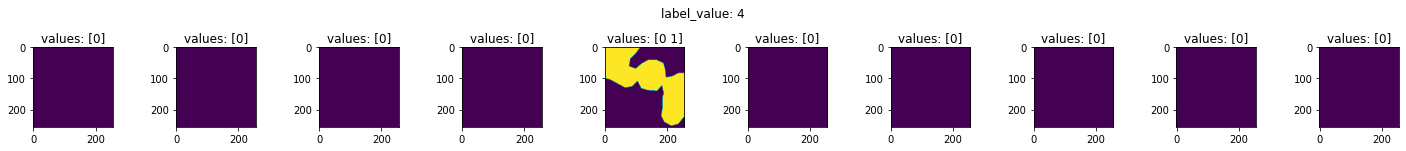

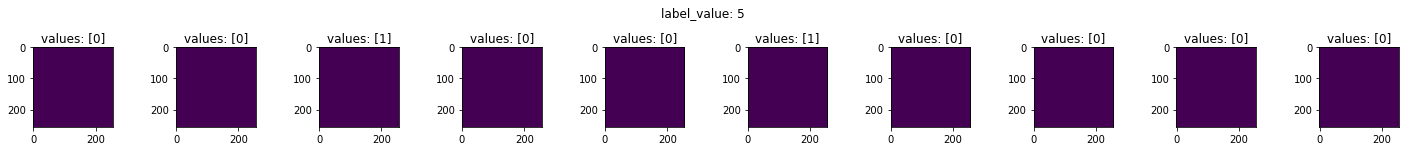

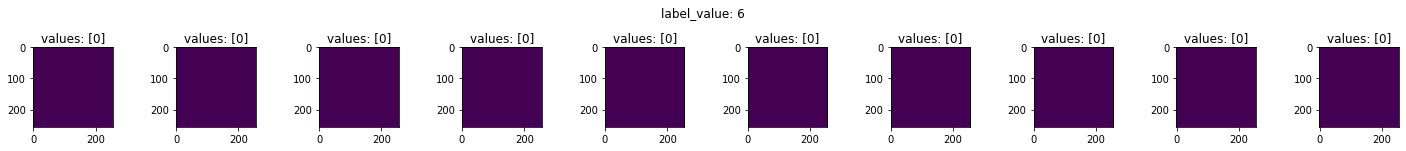

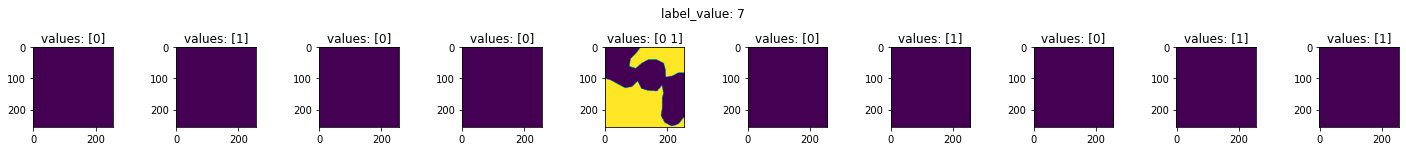

In [9]:
# create batch iterator via context manager
training_batch_generator = create_batch_iterator(user_config=user_config, 
                                                 mode=mode, 
                                                  presets=('onehotencoding',),
                                                 cpus=cpus)

    

for idx in range(1):
    x_batch, y_batch, info = next(training_batch_generator)
    # plotting
    fig, axes = plt.subplots(1, training_batch_generator.batch_size, figsize=(20,2))
    fig.suptitle(f'Patches', fontsize=12)
    for batch_index in range(len(x_batch)):
        axes[batch_index].imshow(x_batch[batch_index])
    plt.tight_layout()
    plt.show()
    for ohe_idx in range(y_batch.shape[-1]):
        fig, axes = plt.subplots(1, training_batch_generator.batch_size, figsize=(20,2))
        fig.suptitle(f'label_value: {ohe_idx+1}', fontsize=12)
        for batch_index in range(len(x_batch)):   
            axes[batch_index].set_title(f"values: {np.unique((y_batch[batch_index][..., ohe_idx]))}")
            axes[batch_index].imshow(y_batch[batch_index][..., ohe_idx])
        plt.tight_layout()
        plt.show()
training_batch_generator.stop()